### **MovieLens Latest Datasets**

El conjunto de datos consta de aproximadamente 100,000 calificaciones y 3,600 aplicaciones de etiquetas, asignadas por 600 usuarios a 9,000 películas. Este conjunto diverso y extenso proporciona una amplia gama de preferencias y características de usuario para la creación de un sistema de recomendación. Las calificaciones ofrecen información sobre las interacciones directas entre usuarios y películas, mientras que las aplicaciones de etiquetas añaden una capa adicional de información semántica. Con 600 usuarios participantes, se espera una variedad significativa de gustos y preferencias.

URL: https://grouplens.org/datasets/movielens/latest/

In [143]:
#Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD

In [144]:
movies = pd.read_csv("datos/movies.csv")
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [145]:
ratings = pd.read_csv("datos/ratings.csv")
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [146]:
ratings = ratings.drop(columns=['timestamp'])
ratings

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
...,...,...,...
100831,610,166534,4.0
100832,610,168248,5.0
100833,610,168250,5.0
100834,610,168252,5.0


In [147]:
# Realiza un "join" entre los conjuntos de datos en la columna 'movieId'
df = pd.merge(ratings, movies[['movieId', 'title']], on='movieId', how='left')
df

,userId,movieId,rating,title
0,1,1,4.0,Toy Story (1995)
1,1,3,4.0,Grumpier Old Men (1995)
2,1,6,4.0,Heat (1995)
3,1,47,5.0,Seven (a.k.a. Se7en) (1995)
4,1,50,5.0,"Usual Suspects, The (1995)"
...,...,...,...,...
100831,610,166534,4.0,Split (2017)
100832,610,168248,5.0,John Wick: Chapter Two (2017)
100833,610,168250,5.0,Get Out (2017)
100834,610,168252,5.0,Logan (2017)


In [148]:
# Elimina los años de la columna 'title'
df['title'] = df['title'].str.replace(r'\(\d{4}\)', '').str.strip()
df

,userId,movieId,rating,title
0,1,1,4.0,Toy Story (1995)
1,1,3,4.0,Grumpier Old Men (1995)
2,1,6,4.0,Heat (1995)
3,1,47,5.0,Seven (a.k.a. Se7en) (1995)
4,1,50,5.0,"Usual Suspects, The (1995)"
...,...,...,...,...
100831,610,166534,4.0,Split (2017)
100832,610,168248,5.0,John Wick: Chapter Two (2017)
100833,610,168250,5.0,Get Out (2017)
100834,610,168252,5.0,Logan (2017)


In [149]:
# Numero total de peliculas y usuarios
user_total = df['userId'].nunique()
movie_total = df['movieId'].nunique()

print('Numero total de usuarios: ', user_total)
print('Numero total de peliculas: ', movie_total)

Numero total de usuarios:  610
Numero total de peliculas:  9724


In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   userId   100836 non-null  int64  
 1   movieId  100836 non-null  int64  
 2   rating   100836 non-null  float64
 3   title    100836 non-null  object 
dtypes: float64(1), int64(2), object(1)
memory usage: 3.1+ MB


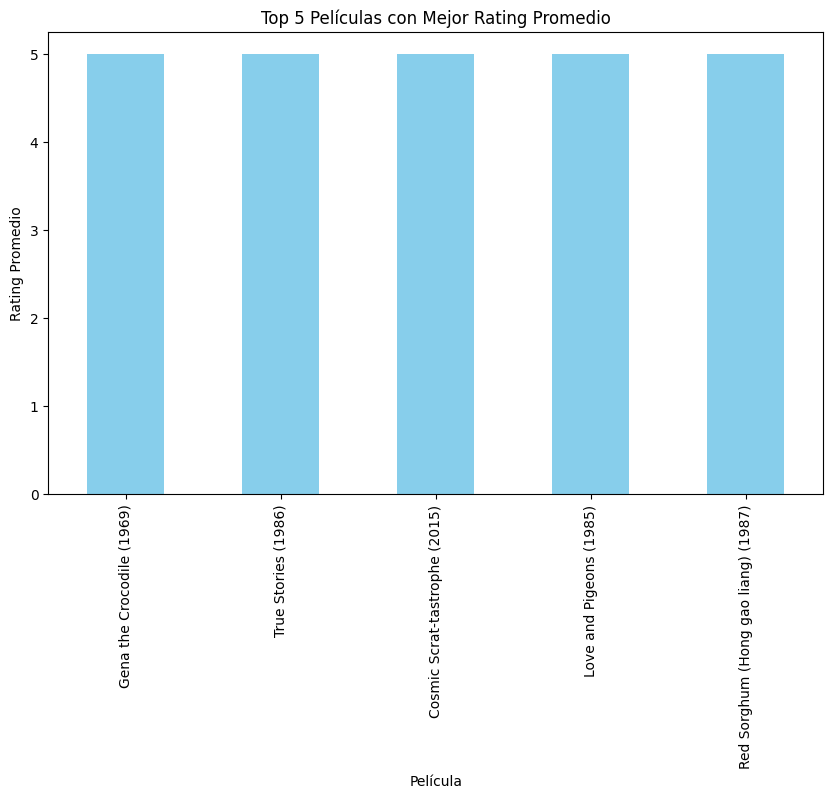

In [151]:
# Calcula el promedio de los ratings para cada película
top_10_movies = df.groupby('title')['rating'].mean().sort_values(ascending=False).head(5)

# Crea un gráfico de barras
plt.figure(figsize=(10, 6))
top_10_movies.plot(kind='bar', color='skyblue')
plt.xlabel('Película')
plt.ylabel('Rating Promedio')
plt.title('Top 5 Películas con Mejor Rating Promedio')
plt.show()

El top 5 de peliculas solo tienen una sola reseña, por lo que es necesario aplicar un filtro para ver el top dentro de las peliculas que posean mas de 10 reseñas.

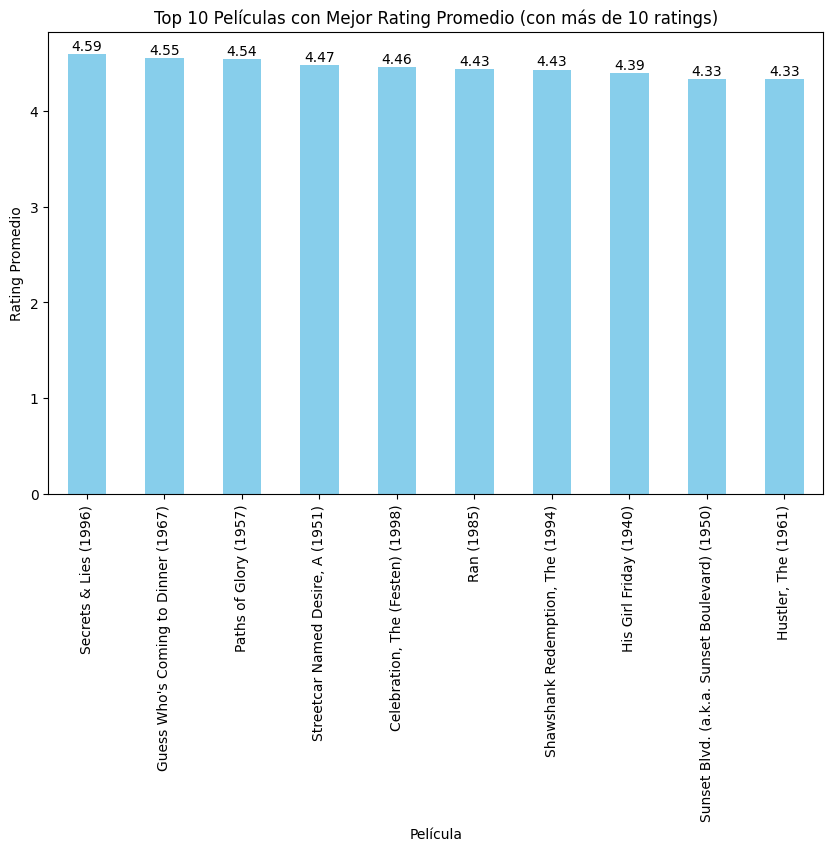

In [152]:
# Filtra las películas que tienen más de 10 ratings
filtered_movies = df.groupby('title').filter(lambda x: x['rating'].count() > 10)

# Calcula el promedio de los ratings para cada película
top_10_movies = filtered_movies.groupby('title')['rating'].mean().sort_values(ascending=False).head(10)

# Crea un gráfico de barras
plt.figure(figsize=(10, 6))
bar_plot = top_10_movies.plot(kind='bar', color='skyblue')
top_10_movies.plot(kind='bar', color='skyblue')
plt.xlabel('Película')
plt.ylabel('Rating Promedio')
plt.title('Top 10 Películas con Mejor Rating Promedio (con más de 10 ratings)')
# Agrega etiquetas con los valores del promedio en cada barra

for index, value in enumerate(top_10_movies):
    bar_plot.text(index, value + 0.01, round(value, 2), ha='center', va='bottom')

plt.show()
plt.show()

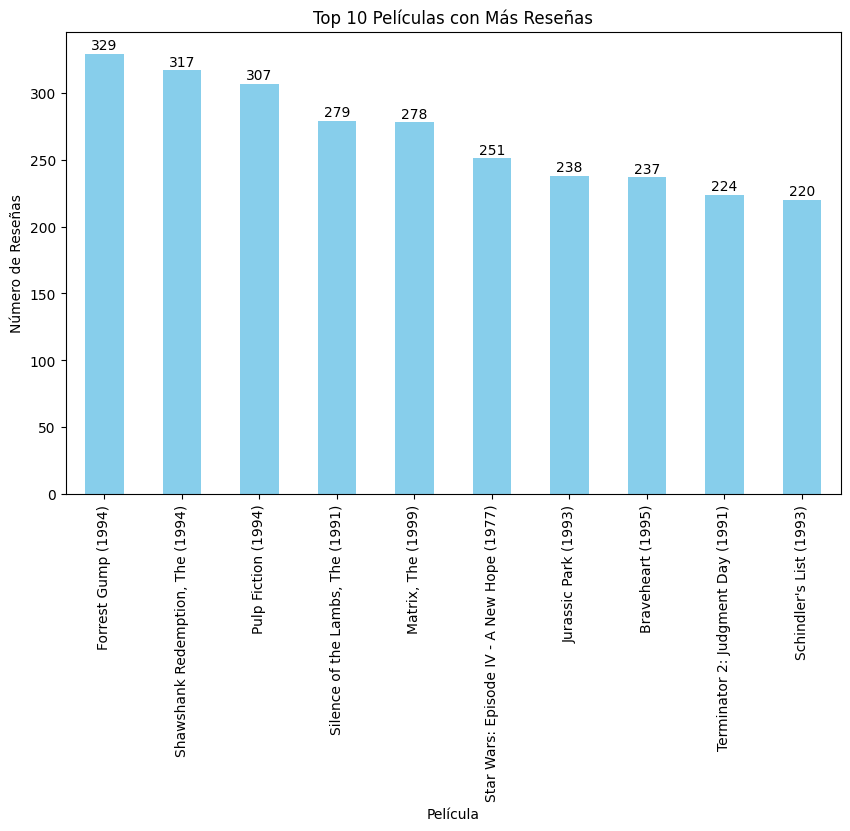

In [153]:
# Calcula el número de reseñas para cada película
top_10_most_reviewed = filtered_movies.groupby('title')['rating'].count().sort_values(ascending=False).head(10)

# Crea un gráfico de barras
plt.figure(figsize=(10, 6))
bar_plot = top_10_most_reviewed.plot(kind='bar', color='skyblue')
plt.xlabel('Película')
plt.ylabel('Número de Reseñas')
plt.title('Top 10 Películas con Más Reseñas')

for index, value in enumerate(top_10_most_reviewed):
    bar_plot.text(index, value + 1, str(value), ha='center', va='bottom')

plt.show()


In [154]:
df.head(5)

,userId,movieId,rating,title
0,1,1,4.0,Toy Story (1995)
1,1,3,4.0,Grumpier Old Men (1995)
2,1,6,4.0,Heat (1995)
3,1,47,5.0,Seven (a.k.a. Se7en) (1995)
4,1,50,5.0,"Usual Suspects, The (1995)"


In [155]:
# Cuenta cuántas veces aparece cada usuario en la columna 'userId'
count_per_movies = df['movieId'].value_counts()

# Filtra los usuarios que hicieron menos de 5 ratings
movies_with_less_than_5_ratings = count_per_movies[count_per_movies < 5]

# Imprime el resultado
print(f'Número de peliculas que tienen menos de 5 ratings: {len(movies_with_less_than_5_ratings)}')

Número de peliculas que tienen menos de 5 ratings: 6074


### **Reducción de dimensionalidad con SVD**

SVD (Singular Value Decomposition) o Descomposición de Valores Singulares, es una técnica de álgebra lineal para factorización de matrices muy similar a PCA. Esta técnica nos permite reducir la dimensionalidad de nuestro dataset, minimizando la perdida de información. Dicho en palabras más simples, después de la descomposición SVD tendremos un dataset más pequeño para simplificar los cálculos que realizaremos mas adelante.

Iniciamos por crear una matriz de usuario-pelicula. Los valores de cada registro corresponden a la calificación que los usuarios le dieron al restaurante correspondiente. Además, para los casos en los que no exista una calificación de usuario, le asignaremos un valor de 0:

In [156]:
# Crecion de matriz
matriz = df.pivot_table(values='rating', index='userId',
                                columns='title', fill_value=0
                                )
matriz.head(5)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Notamos que en esta nueva matriz tenemos una gran cantidad de 0’s. Esto se debe a que cada usuario solo ha evaluado una fracción de los 9446 peliculas.
En álgebra lineal, esta matriz se dice que es dispersa (sparse matrix) y la técnica SVD es conveniente para trabajar con este tipo de matrices.

Deseamos obtener la información latente en relación a las peliculas, por lo que necesitamos a las peliculas en las filas y los usuarios en las columnas. Para ello simplemente tomamos la transpuesta de la matriz:

In [157]:
# Transponemos la matriz
X = matriz.T

print(X.shape)
X.head()

(9719, 610)


userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
'Hellboy': The Seeds of Creation (2004),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Round Midnight (1986),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Salem's Lot (2004),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Til There Was You (1997),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Ahora ya tenemos los datos de forma conveniente para aplicar la descomposición SVD (cada usuario es ahora un “vector-columna”). La librería de machine learning Scikit-learn nos permite hacer la descomposición en un par de líneas de código:

In [158]:
SVD = TruncatedSVD(n_components=609, random_state=42)  
SVD.fit(X)

TruncatedSVD(n_components=609, random_state=42)

Se ha usado la versión truncada de la descomposición SVD. Esto se debe a que en la práctica solo una proporción pequeña de valores singulares son significativos, y por lo tanto una buena aproximación de la matriz original.
Los nuevos vectores obtenidos con SVD son una combinación lineal de los vectores originales. Los vectores singulares se calculan de tal manera que cada vector sucesivo va capturando el mayor grado de variabilidad posible. Gracias a esto, podemos seleccionar un numero reducido de vectores que alcancen a “explicar” suficientemente la información total.



Seleccionamos los primeros 10 vectores singulares y calculamos el porcentaje de información simplificada:

In [159]:
num_sv = 10

print('Información simplificada con los primeros %d vectores singulares:' % num_sv)
print('%.1f%%' %  (100 * (1- (SVD.singular_values_[0:num_sv]).sum() / (SVD.singular_values_).sum())))


Información simplificada con los primeros 10 vectores singulares:
90.6%


Utilizando solo los primeros 10 vectores singulares estamos reduciendo la cantidad de información en un 90%.

El propósito de reducir la dimensionalidad del dataset es el de hacer mas económico el cómputo de la correlación. Esto resulta ventajoso en aplicaciones donde se requieren predicciones en tiempo real.

Ya que hemos determinado un numero de valores singulares para diseñar nuestro modelo, generamos la nueva matriz:

In [160]:
SVD = TruncatedSVD(n_components=num_sv, random_state=42)

resultant_matrix = SVD.fit_transform(X)
resultant_matrix.shape

(9719, 10)

La matriz original de [9446, 610] la hemos reducido a [9446, 10].

In [161]:
# Maztriz con correlación de Pearson
corrMtx = np.corrcoef(resultant_matrix)

### **Sistema de recomendacion**

**Sistemas basados en popularidad (popularity-based)**

Son sencillos de implementar, pero no son personalizados.

Útiles para el problema del “cold start”, es decir cuando se tiene poco o ningun historial del usuario.



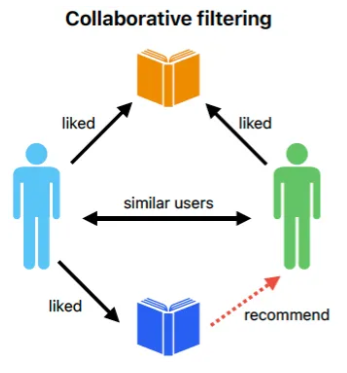

In [162]:
# Ejemplo con la pelicula John Wick: Chapter Two
liked = "John Wick: Chapter Two (2017)"

names = matriz.columns 
names_list = list(names)
id_liked = names_list.index(liked)

corr_recom = corrMtx[id_liked]

print('Recomendaciones: ')
# select names with a correletion between .98 and .99
list(names[(corr_recom > 0.98) & (corr_recom < 0.99)])

Recomendaciones: 


['Adventures of Tintin, The (2011)',
 'Expendables 2, The (2012)',
 'Fast & Furious 6 (Fast and the Furious 6, The) (2013)',
 'Hansel & Gretel: Witch Hunters (2013)',
 'Nerve (2016)',
 'Pacific Rim (2013)',
 'Resident Evil: Afterlife (2010)',
 'Scream 4 (2011)',
 'Spectre (2015)',
 'Summer Wars (Samâ wôzu) (2009)',
 'Wolverine, The (2013)']


Una correlación entre 0.98 y 0.99 indica un alto grado de similitud o relación lineal positiva entre las dos variables comparadas. En el contexto de un sistema de recomendación, la correlación se está utilizando para medir la similitud entre las preferencias de los usuarios para diferentes películas.

Para estec caso, se buscan películas que tengan una correlación alta con "John Wick: Chapter Two". Si la correlación está en el rango de 0.98 a 0.99, significa que estas películas tienen un comportamiento de preferencia similar al de "John Wick: Chapter Two". Por lo que los usuarios que disfrutaron de "John Wick: Chapter Two" también tienden a disfrutar de estas películas con correlaciones en ese rango.